# Supervised Machine Learning Project

## Goal:
#### Use the following variables to predict the price of diamonds ->
- carat
- cut
- color
- clarity

### 1. Utilize the 'train_test_split()' method as well as 'LinearRegression()' to train and test your algorithm. Then cross-validate the work you did.
### 2. Note the variation in model accuracy once you have cross-validated the model using 5 iterations
### 3. Organize the information into a slide presentation that explains the process to analyze the data and the conclusions found

## Import Packages

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Import Data

In [2]:
import seaborn as sns
from sklearn.utils import shuffle
Diamonds = shuffle(sns.load_dataset('diamonds'))

In [4]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
53603,0.70,Ideal,F,SI1,61.3,57.0,2700,5.75,5.71,3.51
51205,0.73,Ideal,G,SI1,62.1,54.0,2351,5.81,5.76,3.59
36103,0.37,Ideal,G,IF,60.5,56.0,926,4.66,4.70,2.83
15034,0.30,Very Good,G,VS1,62.9,57.0,605,4.28,4.31,2.70
15323,1.01,Very Good,G,VS1,61.9,58.0,6152,6.42,6.50,4.00


In [5]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 53603 to 31902
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [8]:
Diamonds['carat'].min()

0.2

In [7]:
Diamonds['carat'].max()

5.01

In [9]:
Diamonds['cut'].unique()

['Ideal', 'Very Good', 'Fair', 'Premium', 'Good']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [10]:
Diamonds['color'].unique()

['F', 'G', 'E', 'H', 'J', 'I', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [11]:
Diamonds['clarity'].unique()

['SI1', 'IF', 'VS1', 'VS2', 'VVS2', 'SI2', 'VVS1', 'I1']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

### Organize data:
- **Carat Weight:** 0.2-5.01
- **Cut:** 'Ideal', 'Premium', 'Very Good', 'Good', 'Fair'
- **Color:** (from best to worst) 'D', 'E', 'F', 'G', 'H', 'I', 'J'
- **Clarity:** (from best to worst) 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'

1. Independent Variables - carat, color, cut, and clarity
2. Dependent Variable - price

## Data Wrangling
### Convert string variables to numeric variables
Create a dictionary for each of the categorical variables:

In [12]:
cut_dict = {"Ideal":1, "Premium":2, "Very Good":3, "Good":4, "Fair":5}
color_dict = {"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}
clarity_dict = {"IF":1, "VVS1":2, "VVS2":3, "VS1":4, "VS2":5, "SI1":6, "SI2":7, "I1":8}

Map in Diamonds dataset:

In [13]:
Diamonds['cut'] = Diamonds['cut'].map(cut_dict)
Diamonds['color'] = Diamonds['color'].map(color_dict)
Diamonds['clarity'] = Diamonds['clarity'].map(clarity_dict)

In [14]:
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
53603,0.70,1,3,6,61.3,57.0,2700,5.75,5.71,3.51
51205,0.73,1,4,6,62.1,54.0,2351,5.81,5.76,3.59
36103,0.37,1,4,1,60.5,56.0,926,4.66,4.70,2.83
15034,0.30,3,4,4,62.9,57.0,605,4.28,4.31,2.70
15323,1.01,3,4,4,61.9,58.0,6152,6.42,6.50,4.00


Define x and y variables:

In [15]:
x = Diamonds[['carat','cut','color','clarity']]
y = Diamonds['price']
#Since data is labeled = Supervised Machine learning 

### Train Test Split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4)
#spliting it 60/40
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(32364, 4) (32364,)
(21576, 4) (21576,)


- **training dataset:** 32,364 rows & 4 columns
- **testing dataset:** 21,576 rows & 4 columns

### Create the Linear Regression Model

In [18]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

## Interpret Supervised Machine Learning Model Accuracy
### Examine Predictions

In [19]:
predictions = lm.predict(x_test)
predictions

array([5855.77918017, 4932.86038616, 2887.34967412, ..., 5494.25140837,
        490.43919102, 6647.60758187])

### Plot information to get a better idea of accuracy

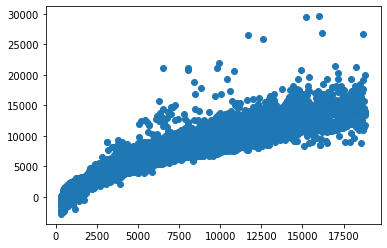

In [20]:
plt.scatter(y_test, predictions)

- Accuracy looks good! 

In [21]:
print("Score:", lm.score(x_test, y_test))

Score: 0.9013837297297377


- Model is accurate approx. 90.4% of the time!

## Examine Errors
### Mean Absolute Error (MAE)
*The mean of the difference btwn the predicted value and the real value.*

In [22]:
metrics.mean_absolute_error(y_test, predictions)

861.6457515714067

- Considering this is between zero to infinity, this number is not that bad.

### Mean Squared Error (MSE)
*The square of the mean absolute error.*

In [23]:
metrics.mean_squared_error(y_test, predictions)

1568654.1047808947

- This number looks high to me.

### Root Mean Squared Error (RMSE)
*The square root of mean squared error.*

In [24]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1252.4592228016427

- This error is acceptable to me, unlike the MSE.

## k-Fold Cross Validation

In [25]:
kfold = KFold(n_splits = 3, shuffle = True)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [    0     3     6 ... 53936 53937 53938], test: [    1     2     4 ... 53928 53930 53939]
train: [    1     2     3 ... 53934 53938 53939], test: [    0     6    14 ... 53935 53936 53937]
train: [    0     1     2 ... 53936 53937 53939], test: [    3     7     8 ... 53931 53934 53938]


In [26]:
print(cross_val_score(lm, x,y, cv = 3))

[0.90310862 0.90494734 0.90438359]


- All trained models are accurate around 90.4% of the time; the model fits very well with the data.